## KNN  기반 모델 생성 ------------------------------------------------

### [1]  분류  => 품종 분류

In [152]:
# 모듈 로딩 -----------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### [1-1]  데이터 준비 및 분석

In [153]:
FILE ='../data/sample_data.csv'

samDF=pd.read_csv(FILE)

In [154]:
samDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Length   49 non-null     float64
 1   Weight   49 non-null     float64
 2   Species  49 non-null     object 
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


In [155]:
samDF.head()

,Length,Weight,Species
0,25.4,242.0,B-Type
1,26.3,290.0,B-Type
2,26.5,340.0,B-Type
3,29.0,363.0,B-Type
4,29.0,430.0,B-Type


#### [1-2] 데이터 전처리

In [156]:
# 타겟 => 품종 ,  데이터 => 길이, 무게  
# 타겟 => 수치화 방법(1)
samDF.Species.replace('B-Type', 0, inplace=True)
samDF.Species.replace('S-Type', 1, inplace=True)

In [157]:
# 타겟 => 수치화 방법(2) 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit_transform(samDF.Species)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1], dtype=int64)

In [158]:
#  타겟 & 데이터 선정
data = samDF[samDF.columns[:-1]].to_numpy()
target = samDF.Species

In [159]:
data.shape, target.shape

((49, 2), (49,))

In [160]:
# 수치 데이터 스케일링 --------------------------------------------------
from sklearn.preprocessing import StandardScaler

std= StandardScaler()
std.fit(data)
std_data=std.transform(data)

In [161]:
std_data[:5]

array([[-0.16326134, -0.62350364],
       [-0.07448421, -0.47571019],
       [-0.05475596, -0.32175867],
       [ 0.19184717, -0.25094097],
       [ 0.19184717, -0.04464594]])

In [162]:
data =std_data

#### [1-3] 학습용 & 테스트용 데이터 준비

In [163]:
# 학습용 & 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=10)

In [164]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((36, 2), (36,), (13, 2), (13,))

#### [1-4] 모델 객체 생성 및 학습

In [165]:
knnModel = KNeighborsClassifier()
knnModel.fit(X_train, y_train)

KNeighborsClassifier()

In [166]:
knnModel.score(X_test, y_test)

1.0

#### [1-5] 예측 및 평가

In [167]:
new_data = std.transform(np.array([27.8, 358]).reshape(-1,2))
new_data

# 예측값
knnModel.predict(new_data)

array([0], dtype=int64)

In [168]:
# 예측 확률 - 품종별 확률값 
knnModel.predict_proba(new_data)

array([[1., 0.]])

In [169]:
# 데이터의 이웃 데이터 정보 => 거리, 인덱스
distance_, index_ = knnModel.kneighbors(new_data)

distance_, index_, 

(array([[0.25131231, 0.25637905, 0.33965864, 0.35684171, 0.41798393]]),
 array([[18,  7, 12, 27, 13]], dtype=int64))

In [170]:
X_train.shape, y_train.shape

((36, 2), (36,))

In [171]:
knei_length = X_train[[13, 7, 18, 12, 27]][:, 0]
knei_width = X_train[[13, 7, 18, 12, 27]][:, 1]

Text(0, 0.5, 'Weight')

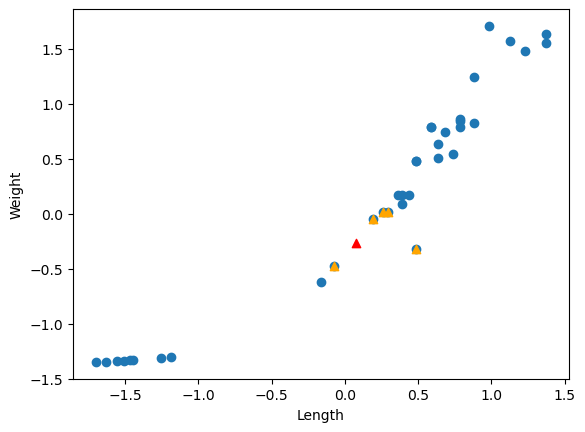

In [173]:
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.scatter(new_data[0][0], new_data[0][1], marker='^', c='red')
plt.scatter(knei_length, knei_width, marker='^', c='orange')
plt.xlabel("Length")
plt.ylabel("Weight")

### [2] 회귀 => 길이로 무게 예측

In [174]:
#  타겟 & 데이터 선정
data = samDF.Length.to_numpy().reshape(-1, 1)
target = samDF.Weight.to_numpy()

In [178]:
data.shape, target.shape

((49, 1), (49,))

In [179]:
data[:5], target[:5], data.max(), target.max()

(array([[25.4],
        [26.3],
        [26.5],
        [29. ],
        [29. ]]),
 array([242., 290., 340., 363., 430.]),
 41.0,
 1000.0)

In [180]:
# 학습용 & 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=10)

In [181]:
X_train[:5], y_train[:5]

(array([[39.5],
        [31. ],
        [34. ],
        [ 9.8],
        [36. ]]),
 array([925. , 475. , 685. ,   6.7, 714. ]))

Text(0, 0.5, 'Weight')

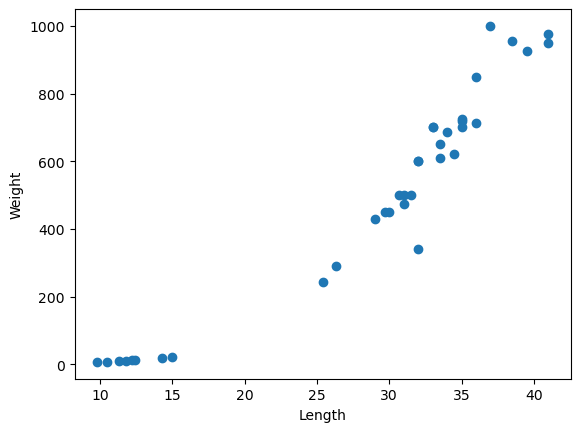

In [183]:
plt.scatter(X_train, y_train)
plt.xlabel("Length")
plt.ylabel("Weight")

#### [2-3] 회귀 모델 객체 생성

In [184]:
regModel=KNeighborsRegressor()

In [185]:
regModel.fit(X_train, y_train)

KNeighborsRegressor()

In [186]:
regModel.score(X_test, y_test)

0.9790911706685951

In [187]:
new_data = np.array([32.7]).reshape(-1,1)
y_pre = regModel.predict(new_data)
y_pre

array([588.])

In [188]:
distance_, index_ = regModel.kneighbors(new_data)

index_

array([[16, 23, 33, 13, 17]], dtype=int64)

In [189]:
knei_length = X_train[index_[0]]
knei_width = y_train[index_[0]]

In [190]:
knei_length, knei_width

(array([[33.],
        [33.],
        [32.],
        [32.],
        [32.]]),
 array([700., 700., 600., 340., 600.]))

Text(0, 0.5, 'Weight')

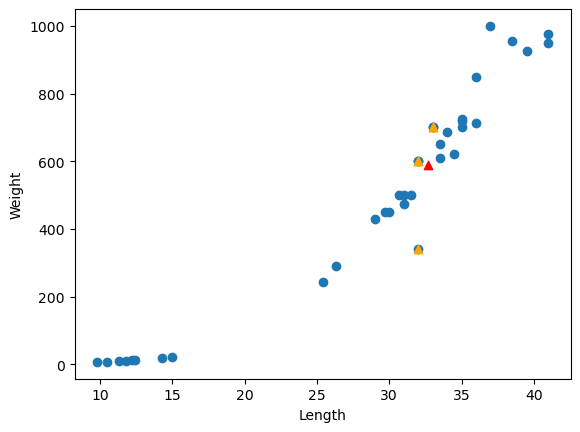

In [191]:
plt.scatter(X_train,y_train)
plt.scatter(new_data, y_pre, marker='^', c='red')
plt.scatter(knei_length, knei_width, marker='^', c='orange')
plt.xlabel("Length")
plt.ylabel("Weight")

### X, y 값의 범위 크기 발생 => 스케일링


In [251]:
#  타겟 & 데이터 선정
data = samDF.Length.to_numpy().reshape(-1, 1)
target = samDF.Weight.to_numpy().reshape(-1, 1)

In [252]:
data[:5], target[:5], data.shape, target.shape

(array([[25.4],
        [26.3],
        [26.5],
        [29. ],
        [29. ]]),
 array([[242.],
        [290.],
        [340.],
        [363.],
        [430.]]),
 (49, 1),
 (49, 1))

In [253]:
# 수치 데이터 스케일링 --------------------------------------------------
from sklearn.preprocessing import StandardScaler

stdData= StandardScaler()
stdData.fit(data)
std_data=stdData.transform(data)

In [254]:
data = std_data

In [255]:
stdTarget= StandardScaler()
stdTarget.fit(target)
std_target=stdTarget.transform(target)

In [256]:
target = std_target

In [257]:
data[:5], target[:5], data.max(), target.max()

(array([[-0.16326134],
        [-0.07448421],
        [-0.05475596],
        [ 0.19184717],
        [ 0.19184717]]),
 array([[-0.62350364],
        [-0.47571019],
        [-0.32175867],
        [-0.25094097],
        [-0.04464594]]),
 1.3755421942005543,
 1.7104013561427538)

In [258]:
# 학습용 & 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=10)

In [259]:
X_train.max(), X_test.max(), y_train.max()

(1.3755421942005543, 1.1289390641119141, 1.7104013561427538)

In [260]:
regModel2=KNeighborsRegressor()
regModel2.fit(X_train, y_train)

KNeighborsRegressor()

In [261]:
regModel2.score(X_test, y_test)

0.9773421802365502

#### 스케일링된 예측데이터

In [265]:
new_data2 = stdData.transform(np.array([32.7]).reshape(-1,1))
new_data2, new_data2.shape

(array([[0.5568198]]), (1, 1))

In [267]:
y_pre = regModel2.predict(new_data2)
new_data2, y_pre

(array([[0.5568198]]), array([[0.44184085]]))

In [272]:
distance_, index_ = regModel2.kneighbors(new_data2)

index_

array([[16, 23, 33, 13, 17]], dtype=int64)

In [273]:
knei_length = X_train[index_[0]]
knei_width = y_train[index_[0]]

In [270]:
knei_length

array([[0.58641218],
       [0.58641218],
       [0.48777093],
       [0.48777093],
       [0.48777093]])

####  예측결과 시각화

Text(0, 0.5, 'Weight')

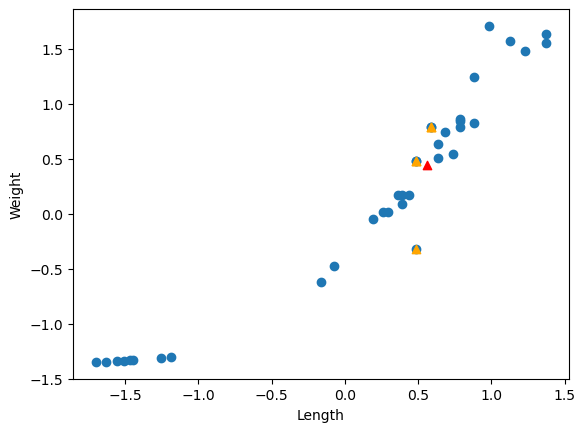

In [271]:
plt.scatter(X_train,y_train)
plt.scatter(new_data2, y_pre, marker='^', c='red')
plt.scatter(knei_length, knei_width, marker='^', c='orange')
plt.xlabel("Length")
plt.ylabel("Weight")

####  아주 큰 데이터 입력 후 예측

In [231]:
big_data1 = stdData.transform(np.array([32.7]).reshape(-1,1))

y_pre = regModel2.predict(big_data1)
y_pre

array([[1.59031917]])